In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly
plotly.tools.set_credentials_file(username='hkaansimsek', api_key='B4WSyA39aZe0JfKoRNKO')
import plotly.plotly as py
import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objs as go 
from datetime import datetime
import quandl
quandl.ApiConfig.api_key = 'juBhh_nJvkXEYRKCSkF3'
goog = quandl.get('WIKI/GOOG')
goog.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13100.0,0.0,1.0,568.000,568.00,552.92,558.46,13100.0
2014-03-28,561.200,566.43,558.67,559.99,41100.0,0.0,1.0,561.200,566.43,558.67,559.99,41100.0
2014-03-31,566.890,567.00,556.93,556.97,10800.0,0.0,1.0,566.890,567.00,556.93,556.97,10800.0
2014-04-01,558.710,568.45,558.71,567.16,7900.0,0.0,1.0,558.710,568.45,558.71,567.16,7900.0
2014-04-02,565.106,604.83,562.19,567.00,146700.0,0.0,1.0,565.106,604.83,562.19,567.00,146700.0


In [2]:
trace = go.Scatter(x=list(goog.index),
                   y=list(goog.Close), line=dict(color='red'))

dat = [trace]
layout = dict(
    title='Google Stock Price',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=dat, layout=layout)
py.iplot(fig)

In [3]:
import fbprophet
goog=goog.reset_index()
goog = goog.rename(columns={'Date': 'ds', 'Close': 'y'})
fbp = fbprophet.Prophet()
fbp.fit(goog)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5,1,'Google Stock Value')

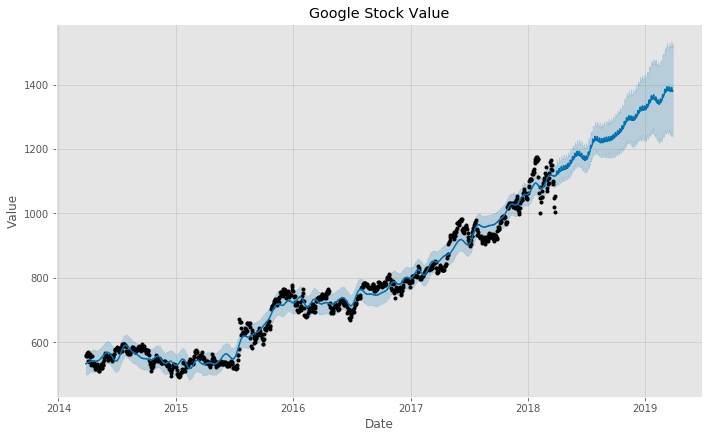

In [4]:
goog_forecast = fbp.make_future_dataframe(periods=365)
goog_forecast = fbp.predict(goog_forecast)
fbp.plot(goog_forecast, xlabel = 'Date', ylabel = 'Value')
plt.title('Google Stock Value')

32    2014-05-13
64    2014-06-27
96    2014-08-13
129   2014-09-30
161   2014-11-13
193   2014-12-31
225   2015-02-18
257   2015-04-06
289   2015-05-20
322   2015-07-08
354   2015-08-21
386   2015-10-07
418   2015-11-20
450   2016-01-08
482   2016-02-25
515   2016-04-13
547   2016-05-27
579   2016-07-14
611   2016-08-29
643   2016-10-13
675   2016-11-29
708   2017-01-18
740   2017-03-06
772   2017-04-20
804   2017-06-06
Name: ds, dtype: datetime64[ns]


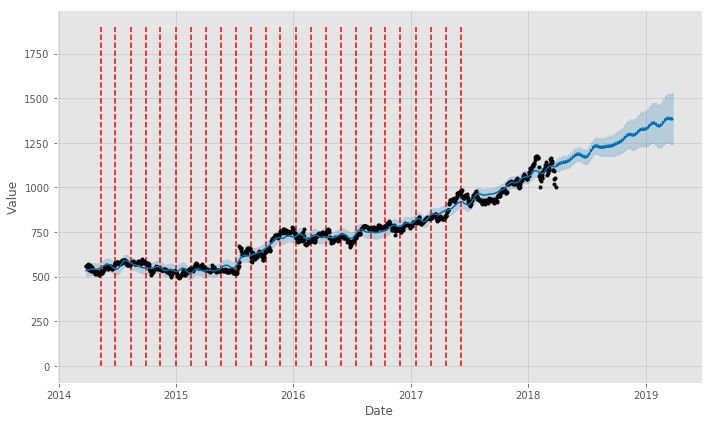

In [5]:
fbp.plot(goog_forecast, xlabel = 'Date', ylabel = 'Value')
plt.vlines([str(date) for date in fbp.changepoints], ymin = 0, ymax= 1900, color='r',linestyles = 'dashed')
print(fbp.changepoints)

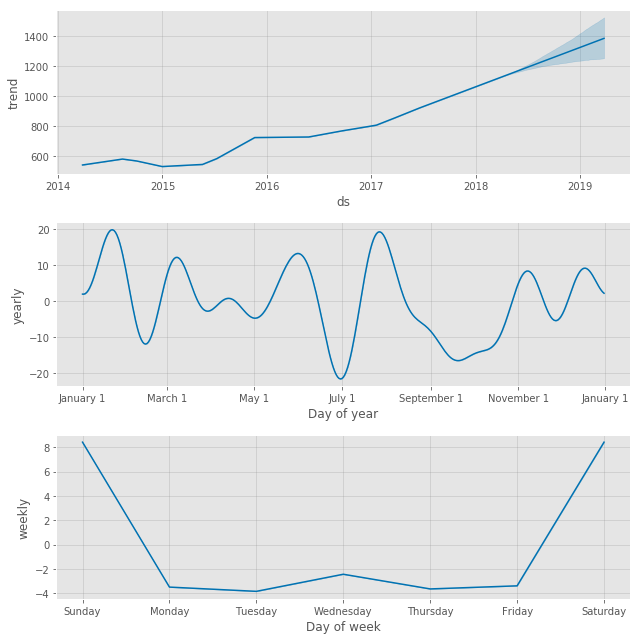

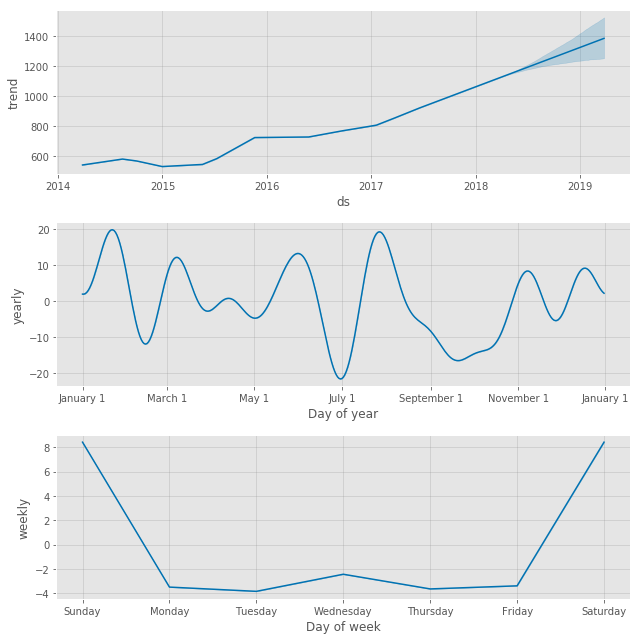

In [6]:
fbp.plot_components(goog_forecast)